## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
#combined_data = mouse_metadata.merge(study_results)
combined_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
unique = combined_mice_df['Mouse ID'].unique()
#unique
print('There are ' + str(len(unique)) + ' mice in the study.')
len(combined_mice_df['Mouse ID'])

There are 249 mice in the study.


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = combined_mice_df.drop_duplicates(['Mouse ID','Timepoint'], keep = 'last')
#mouse_study_df = mouse_study_complete.drop_duplicates(['Mouse ID', 'Timepoint'], keep = 'last')
print("Duplicate mice are: ", duplicates_df, sep='\n')

Duplicate mice are: 
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898            

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mice_df.drop_duplicates(keep=False,inplace=True) 
combined_mice_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
unique = combined_mice_df['Mouse ID'].unique()
#unique
print('There are ' + str(len(unique)) + ' mice in the study.')


There are 249 mice in the study.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_mice_df['Tumor Volume (mm3)'].describe()
vol_mean = combined_mice_df.groupby(combined_mice_df['Drug Regimen'])['Tumor Volume (mm3)'].mean()
vol_median = combined_mice_df.groupby(combined_mice_df['Drug Regimen'])['Tumor Volume (mm3)'].median()
vol_var = combined_mice_df.groupby(combined_mice_df['Drug Regimen'])['Tumor Volume (mm3)'].var()
vol_std = combined_mice_df.groupby(combined_mice_df['Drug Regimen'])['Tumor Volume (mm3)'].std()
vol_sem = combined_mice_df.groupby(combined_mice_df['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame({
    'Mean':vol_mean,
    'Median':vol_median,
    'Variance':vol_var,
    'Standard Deviation': vol_std,
    'SEM':vol_sem
})
summary
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.414660,50.965298,42.199890,6.496144,0.515178
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0.5, 1.02, 'Number of Mice per Timepoint')

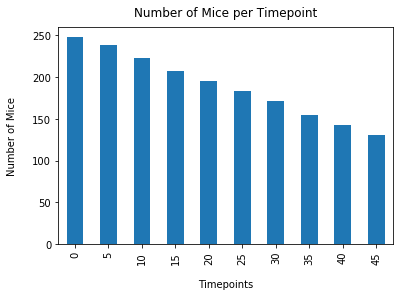

In [33]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
combined_mice_df['Timepoint'].value_counts().plot(kind='bar')
plt.xlabel('Timepoints', labelpad=15)
plt.ylabel("Number of Mice", labelpad=15)
plt.title("Number of Mice per Timepoint", y=1.02)



([<matplotlib.axis.XTick at 0x20551c83188>,
 <a list of 10 Text xticklabel objects>)

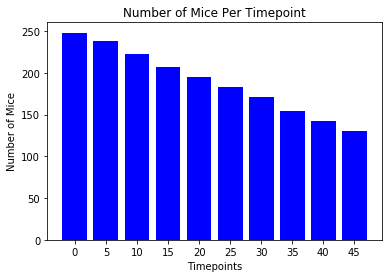

In [23]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(combined_mice_df['Timepoint'].unique()))
timepoints = ['0','5','10','15','20','25','30','35','40','45']
#plt.bar(x_axis , color="b", align="center")
timepoint_groups = combined_mice_df.groupby(combined_mice_df['Timepoint']).count()
mice_in_timepoint = timepoint_groups['Mouse ID']
#mice_in_timepoint
plt.bar(x_axis,mice_in_timepoint, color="b", align="center")

plt.title("Number of Mice Per Timepoint")
plt.xlabel("Timepoints")
plt.ylabel("Number of Mice")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["0", "5", "10", "15", "20", "25", "30", "35","40","45"])

## Pie Plots

,Male,Female
Gender,125,124


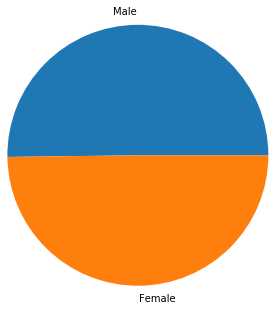

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


male_mice = combined_mice_df.loc[combined_mice_df['Sex'] == 'Male']
#male_mice = len(male_mice['Mouse ID'].unique())

female_mice = combined_mice_df.loc[combined_mice_df['Sex']=='Female']
#female_mice = len(female_mice['Mouse ID'].unique())

#gender_df = pd.DataFrame({'Male':male_mice,
#             'Female':female_mice},
#            index=['Gender'])
#gender_df.plot.pie()

#sizes = [male_mice, female_mice]
#labels = ['Male', 'Female']

plt.pie(sizes, labels=labels, radius = 1.5)

df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
df
gender_df
#plot = df.plot.pie(y='mass', figsize=(5, 5))

In [34]:
combined_mice_df['Timepoint'].value_counts()

0     248
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

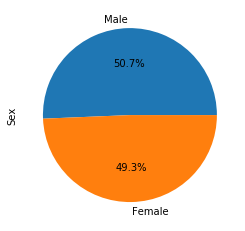

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_count = combined_mice_df['Sex'].value_counts()
pie_1 = combined_mice_df['Sex'].value_counts().plot.pie(y='Sex', autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
summary.sort_values('Standard Deviation',ascending = True)['Standard Deviation'].head(4)
ramicane = combined_mice_df.loc[combined_mice_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
ramicane_quartiles = ramicane.quantile([.25,.5,.75])
ramicane_q1 = ramicane_quartiles[0.25]
ramicane_q3 = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_q3 - ramicane_q1
ramicane_lower_bound = ramicane_q1 -(1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_q3 +(1.5*ramicane_iqr)
print(f'values below {ramicane_lower_bound} could be outliers.')
print(f'values above {ramicane_upper_bound} could be outliers.')

values below 24.18658646249998 could be outliers.
values above 57.48804812250001 could be outliers.


In [13]:
capomulin = combined_mice_df.loc[combined_mice_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
capomulin_quartiles = capomulin.quantile([.25,.5,.75])
capomulin_quartiles = capomulin.quantile([.25,.5,.75])
capomulin_q1 = capomulin_quartiles[0.25]
capomulin_q3 = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_q3 - capomulin_q1
capomulin_lower_bound = capomulin_q1 -(1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_q3 +(1.5*capomulin_iqr)
print(f'values below {capomulin_lower_bound} could be outliers.')
print(f'values above {capomulin_upper_bound} could be outliers.')

values below 26.714832162499995 could be outliers.
values above 55.9711007025 could be outliers.


In [14]:
infubinol = combined_mice_df.loc[combined_mice_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
infubinol_quartiles = infubinol.quantile([.25,.5,.75])
infubinol_q1 = infubinol_quartiles[0.25]
infubinol_q3 = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_q3 - infubinol_q1
infubinol_lower_bound = infubinol_q1 -(1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_q3 +(1.5*infubinol_iqr)
print(f'values below {infubinol_lower_bound} could be outliers.')
print(f'values above {infubinol_upper_bound} could be outliers.')

values below 32.309217298749985 could be outliers.
values above 72.31757996875001 could be outliers.


In [15]:
ceftamin = combined_mice_df.loc[combined_mice_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
ceftamin_quartiles = ceftamin.quantile([.25,.5,.75])
ceftamin_q1 = ceftamin_quartiles[0.25]
ceftamin_q3 = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_q3 - ceftamin_q1
ceftamin_lower_bound = ceftamin_q1 -(1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_q3 +(1.5*ceftamin_iqr)
print(f'values below {ceftamin_lower_bound} could be outliers.')
print(f'values above {ceftamin_upper_bound} could be outliers.')

values below 32.818911426250004 could be outliers.
values above 71.19095325625 could be outliers.


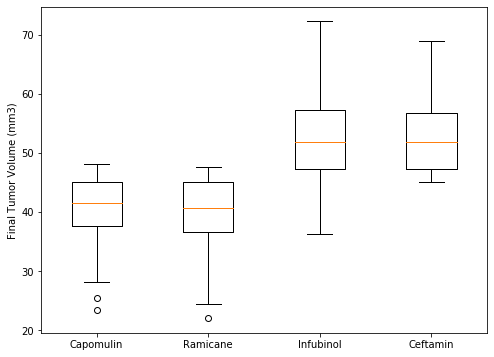

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axl = plt.subplots(figsize=(8,6))
#set y_axis label
axl.set_ylabel('Final Tumor Volume (mm3)')
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

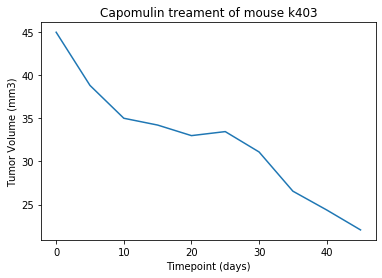

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_k403 = combined_mice_df.loc[combined_mice_df['Mouse ID'] == 'k403']
#fig, ax1 = plt.subplots(figsize=(8,6))
plt.plot(mouse_k403['Timepoint'], mouse_k403['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin treament of mouse k403')
plt.show()

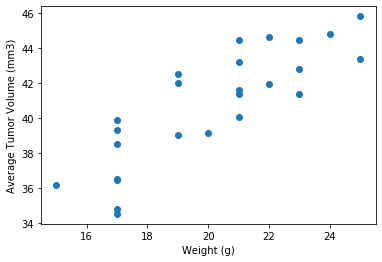

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin = combined_mice_df[combined_mice_df['Drug Regimen'] == 'Capomulin']
scatter_df = Capomulin.groupby(['Mouse ID']).mean()
plt.scatter(scatter_df['Weight (g)'],scatter_df['Tumor Volume (mm3)'])

plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

0.8419363424694717
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)


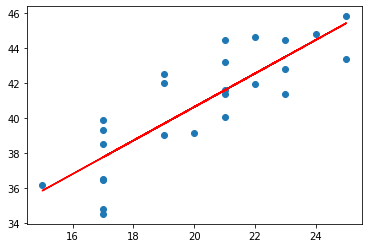

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatter_df['Weight (g)'],scatter_df['Tumor Volume (mm3)'])[0]
print(correlation)

line_regression = st.linregress(scatter_df['Weight (g)'],scatter_df['Tumor Volume (mm3)'])
print(line_regression)

graph_line = scatter_df['Weight (g)']*line_regression[0]+line_regression[1]

plt.scatter(scatter_df['Weight (g)'],scatter_df['Tumor Volume (mm3)'])
plt.plot(scatter_df['Weight (g)'],graph_line,color = 'red')